## Seth TIQC File

In [17]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import mannwhitneyu

In [3]:
# import .csv/excel files
filepath='/home/seth/Documents/tech_incubator/survey_responses/'
post_survey_1 = pd.read_excel(filepath+'Post-InternshipServeyResponses.xlsx', sheet_name="Form Responses 1")
post_survey_2 = pd.read_excel(filepath+'TIQC_Post-InternshipSurveyResponses.xlsx', sheet_name="Form Responses 1")
pre_survey = pd.read_excel(filepath+'Pre-InternshipSurveyResponses.xlsx', sheet_name="Form Responses 1")

In [63]:
column_names_post_survey_1 = [
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Leadership ]',
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Ability to work in a team ]',
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Writing Effectively ]',
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Speaking Effectively ]',
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Problem Solving ]',
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Initiative ]',
    'How comfortable do you feel with the following workplace skills upon completion of your internship ? [Analytical/Quantitative ]'
]
column_names_pre_survey = [
    'How comfortable are you with the following workplace skills? [Leadership ]',
    'How comfortable are you with the following workplace skills? [Ability to work in a team ]',
    'How comfortable are you with the following workplace skills? [Writing Effectively ]',
    'How comfortable are you with the following workplace skills? [Speaking Effectively ]',
    'How comfortable are you with the following workplace skills? [Problem Solving ]',
    'How comfortable are you with the following workplace skills? [Initiative ]',
    'How comfortable are you with the following workplace skills? [Analytical/Quantitative ]'
]
valid_responses = [
    'Extremely Uncomfortable',
    'Moderately Uncomfortable',
    'Neutral',
    'Moderately Comfortable',
    'Extremely Comfortable'
]

In [53]:
for col in column_names_post_survey_1:
    post_survey_1 = post_survey_1[post_survey_1[col].isin(valid_responses)]
for col in column_names_pre_survey:
    pre_survey = pre_survey[pre_survey[col].isin(valid_responses)]

In [55]:
print(post_survey_1.shape)
print(pre_survey.shape)

(18, 14)
(156, 13)


In [81]:
paired_data = []
for col_pre, col_post in zip(column_names_pre_survey, column_names_post_survey_1):
    output_post1 =  post_survey_1.groupby(col_post, as_index=True)[col_post].count().to_frame().rename(columns={col_post:'count'})
    output_pre=pre_survey.groupby(col_pre, as_index=True)[col_pre].count().to_frame().rename(columns={col_pre:'count'})
    joined_data = output_post1.join(other=output_pre, how='outer', lsuffix="_post_survey", rsuffix="_pre_survey")
    joined_data.count_post_survey = joined_data.count_post_survey.fillna(0).astype(int)
    joined_data = joined_data.reindex(valid_responses)
    
    paired_data.append([col_pre, col_post, joined_data])

In [74]:
df = pd.DataFrame(joined_data)
cols = df.columns
df[cols] = df[cols].div(df[cols].sum(axis=0), axis=1).multiply(100)
df

,count_post_survey,count_pre_survey
Extremely Uncomfortable,0.000000,0.641026
Moderately Uncomfortable,0.000000,7.051282
Neutral,0.000000,25.000000
Moderately Comfortable,33.333333,42.948718
Extremely Comfortable,66.666667,24.358974


<AxesSubplot: >

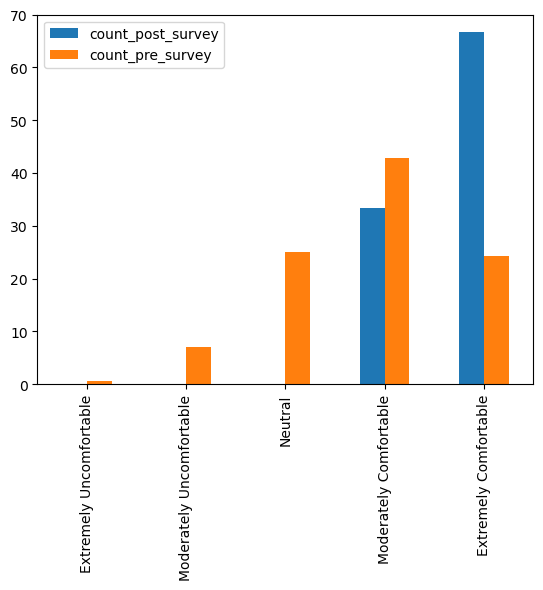

In [75]:
df.plot(kind='bar', stacked=False)

In [83]:
for obj in paired_data:
    my_mannwhitneyu, p = mannwhitneyu(obj[2].count_post_survey, obj[2].count_pre_survey, method='exact')
    print(obj[1], p)

How comfortable do you feel with the following workplace skills upon completion of your internship ? [Leadership ] 0.05555555555555555
How comfortable do you feel with the following workplace skills upon completion of your internship ? [Ability to work in a team ] 0.15079365079365079
How comfortable do you feel with the following workplace skills upon completion of your internship ? [Writing Effectively ] 0.15079365079365079
How comfortable do you feel with the following workplace skills upon completion of your internship ? [Speaking Effectively ] 0.031746031746031744
How comfortable do you feel with the following workplace skills upon completion of your internship ? [Problem Solving ] 0.09523809523809523
How comfortable do you feel with the following workplace skills upon completion of your internship ? [Initiative ] 0.09523809523809523
How comfortable do you feel with the following workplace skills upon completion of your internship ? [Analytical/Quantitative ] 0.09523809523809523
